# Expérimentation sur le jeu de données AV : Healthcare Analytics II

In [1]:
# https://www.kaggle.com/code/huedt59/predict-length-of-stay-in-hospitals

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import os


for dirname, _, filenames in os.walk('healthcare'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

healthcare/train_data_dictionary.csv
healthcare/sample_sub.csv
healthcare/train_data.csv
healthcare/test_data.csv


# Présentation des données "brut"

In [2]:
train = pd.read_csv('healthcare/train_data.csv')
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [4]:
train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [5]:
# Afficher les valeurs manquantes
null = train.isnull().sum()
print(null)

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


# Préparation des données

## Remplissage des données manquantes

In [6]:
train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True) # On remplace les valeurs manquantes par la valeur la plus fréquente
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)

/var/folders/xw/6533cp092nl4j8x1b0rtnlpm0000gn/T/ipykernel_58953/1046450637.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True) # On remplace les valeurs manquantes par la valeur la plus fréquente
/var/folders/xw/6533cp092nl4j8x1b0rtnlpm0000gn/T/ipykernel_58953/1046450637.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This in

## Supression des valeur null, et des données dupliqué (Si on a pas remplie les données manquantes)

In [7]:
print(null[null>0])
print("taille avant suppression",train.shape)

Bed Grade             113
City_Code_Patient    4532
dtype: int64
taille avant suppression (318438, 18)


In [8]:
#remove null values
train = train.dropna()
print("taille après suppression valeurs nulles",train.shape)

taille après suppression valeurs nulles (318438, 18)


In [9]:
#remove duplicates
train = train.drop_duplicates()
print("taille après suppression duplication",train.shape)

taille après suppression duplication (318438, 18)


## Affichage des données (catégorielles et numériques)

In [10]:
categories = train.select_dtypes(include=['object']).columns
print(categories)
numerics = train.select_dtypes(include=['int64','float64']).columns
print(numerics)

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')
Index(['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit'],
      dtype='object')


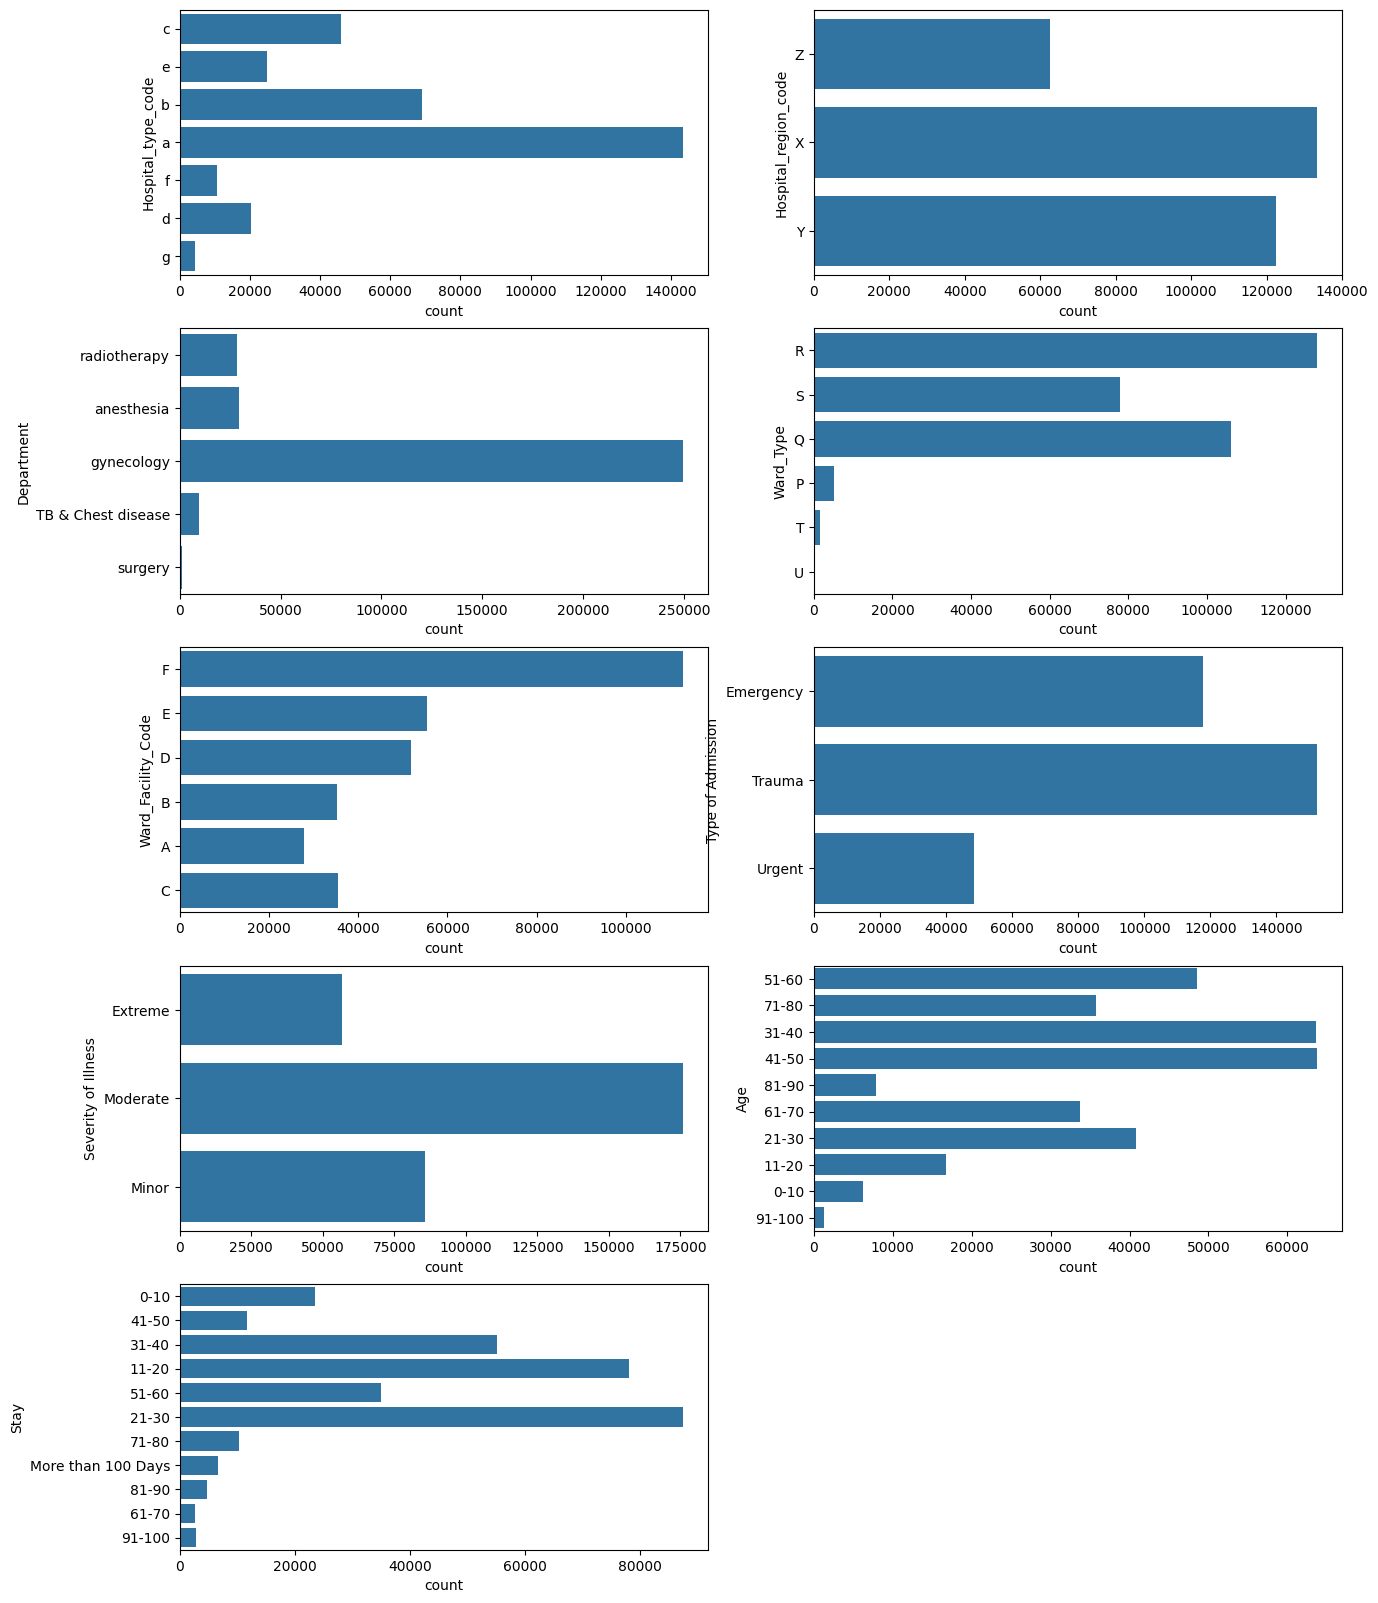

In [11]:
def plot_categories():
    categories = train.select_dtypes(include=['object']).columns
    i=1
    plt.figure(figsize=(15,20))
    for col in categories:
        plt.subplot(5,2,i)
        sns.countplot(train[col])
        i=i+1
    plt.show()

plot_categories()

## Transformation des données catégorielles en données numériques

In [12]:
#transform stay into numeric
train['Stay'] = train['Stay'].replace({'0-10':0,'11-20':1,'21-30':2,'31-40':3,'41-50':4,'51-60':5,'61-70':6,'71-80':7,'81-90':8,'91-100':9,'More than 100 Days':10})

/var/folders/xw/6533cp092nl4j8x1b0rtnlpm0000gn/T/ipykernel_58953/2995781143.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Stay'] = train['Stay'].replace({'0-10':0,'11-20':1,'21-30':2,'31-40':3,'41-50':4,'51-60':5,'61-70':6,'71-80':7,'81-90':8,'91-100':9,'More than 100 Days':10})


In [13]:
print(train['Stay'].value_counts())

Stay
2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: count, dtype: int64


In [14]:
#transform age into numeric
train['Age'] = train['Age'].replace({'0-10':0,'11-20':1,'21-30':2,'31-40':3,'41-50':4,'51-60':5,'61-70':6,'71-80':7,'81-90':8,'91-100':9,'More than 100 Days':10})

/var/folders/xw/6533cp092nl4j8x1b0rtnlpm0000gn/T/ipykernel_58953/3538651006.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Age'] = train['Age'].replace({'0-10':0,'11-20':1,'21-30':2,'31-40':3,'41-50':4,'51-60':5,'61-70':6,'71-80':7,'81-90':8,'91-100':9,'More than 100 Days':10})


In [15]:
print(train['Age'].value_counts())

Age
4    63749
3    63639
5    48514
2    40843
7    35792
6    33687
1    16768
8     7890
0     6254
9     1302
Name: count, dtype: int64


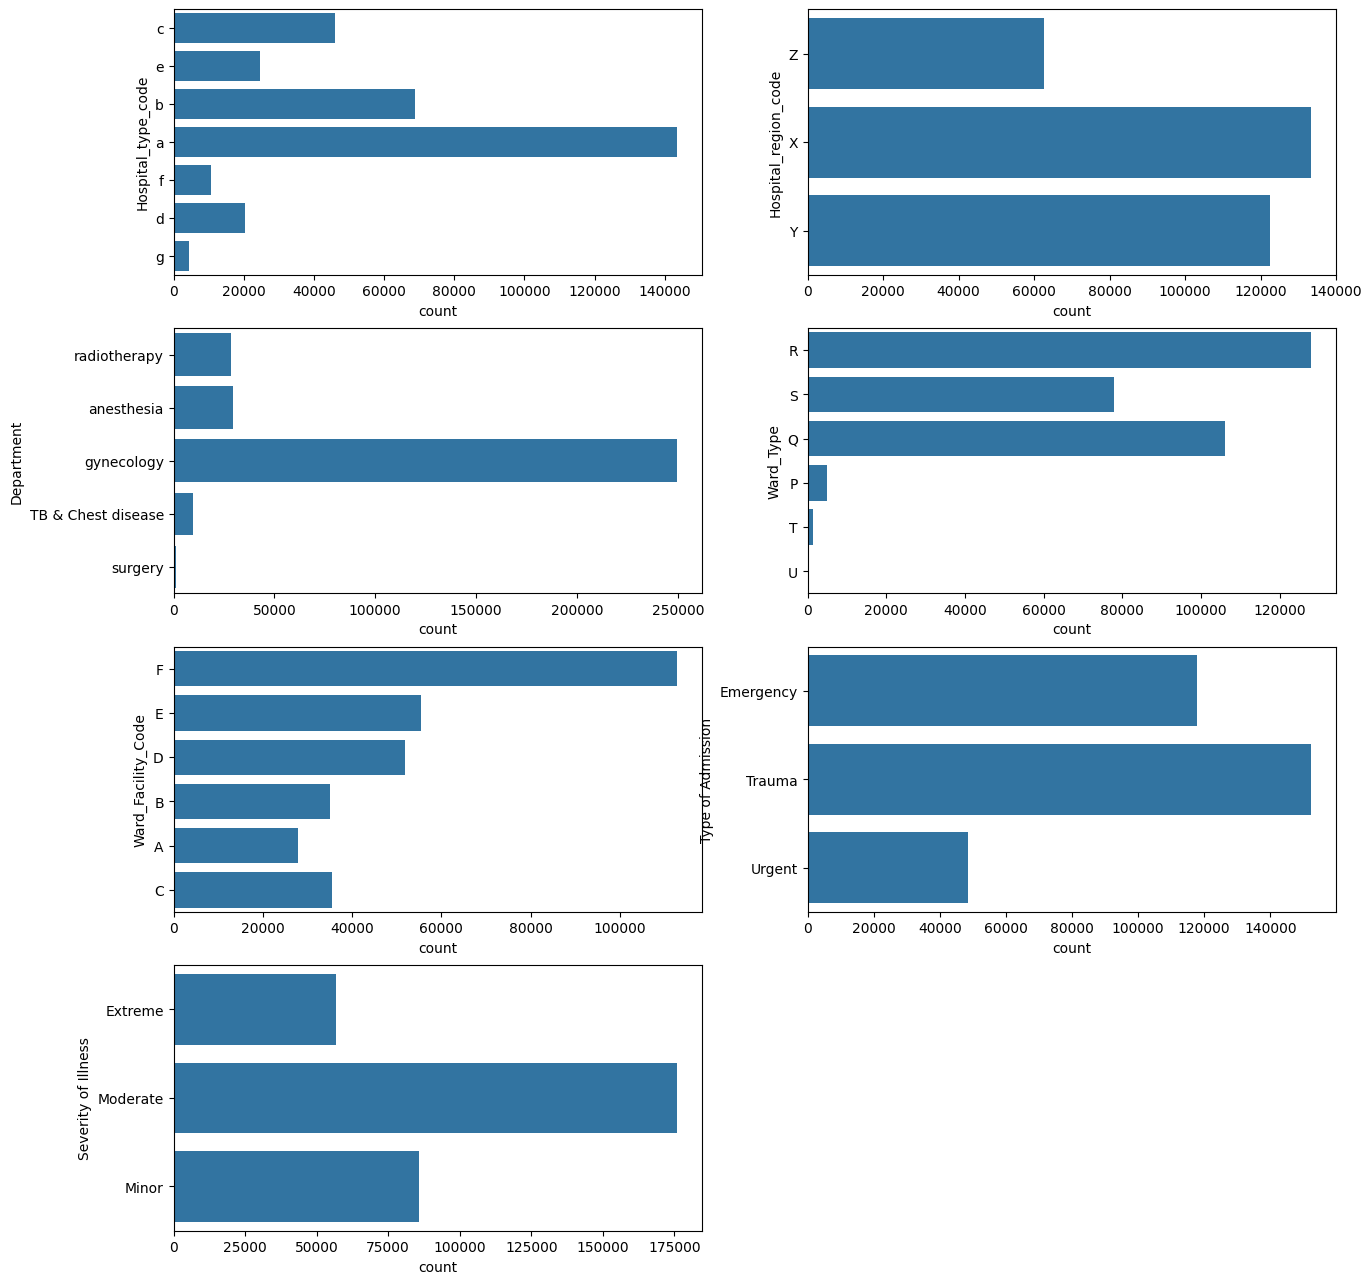

In [16]:
plot_categories()

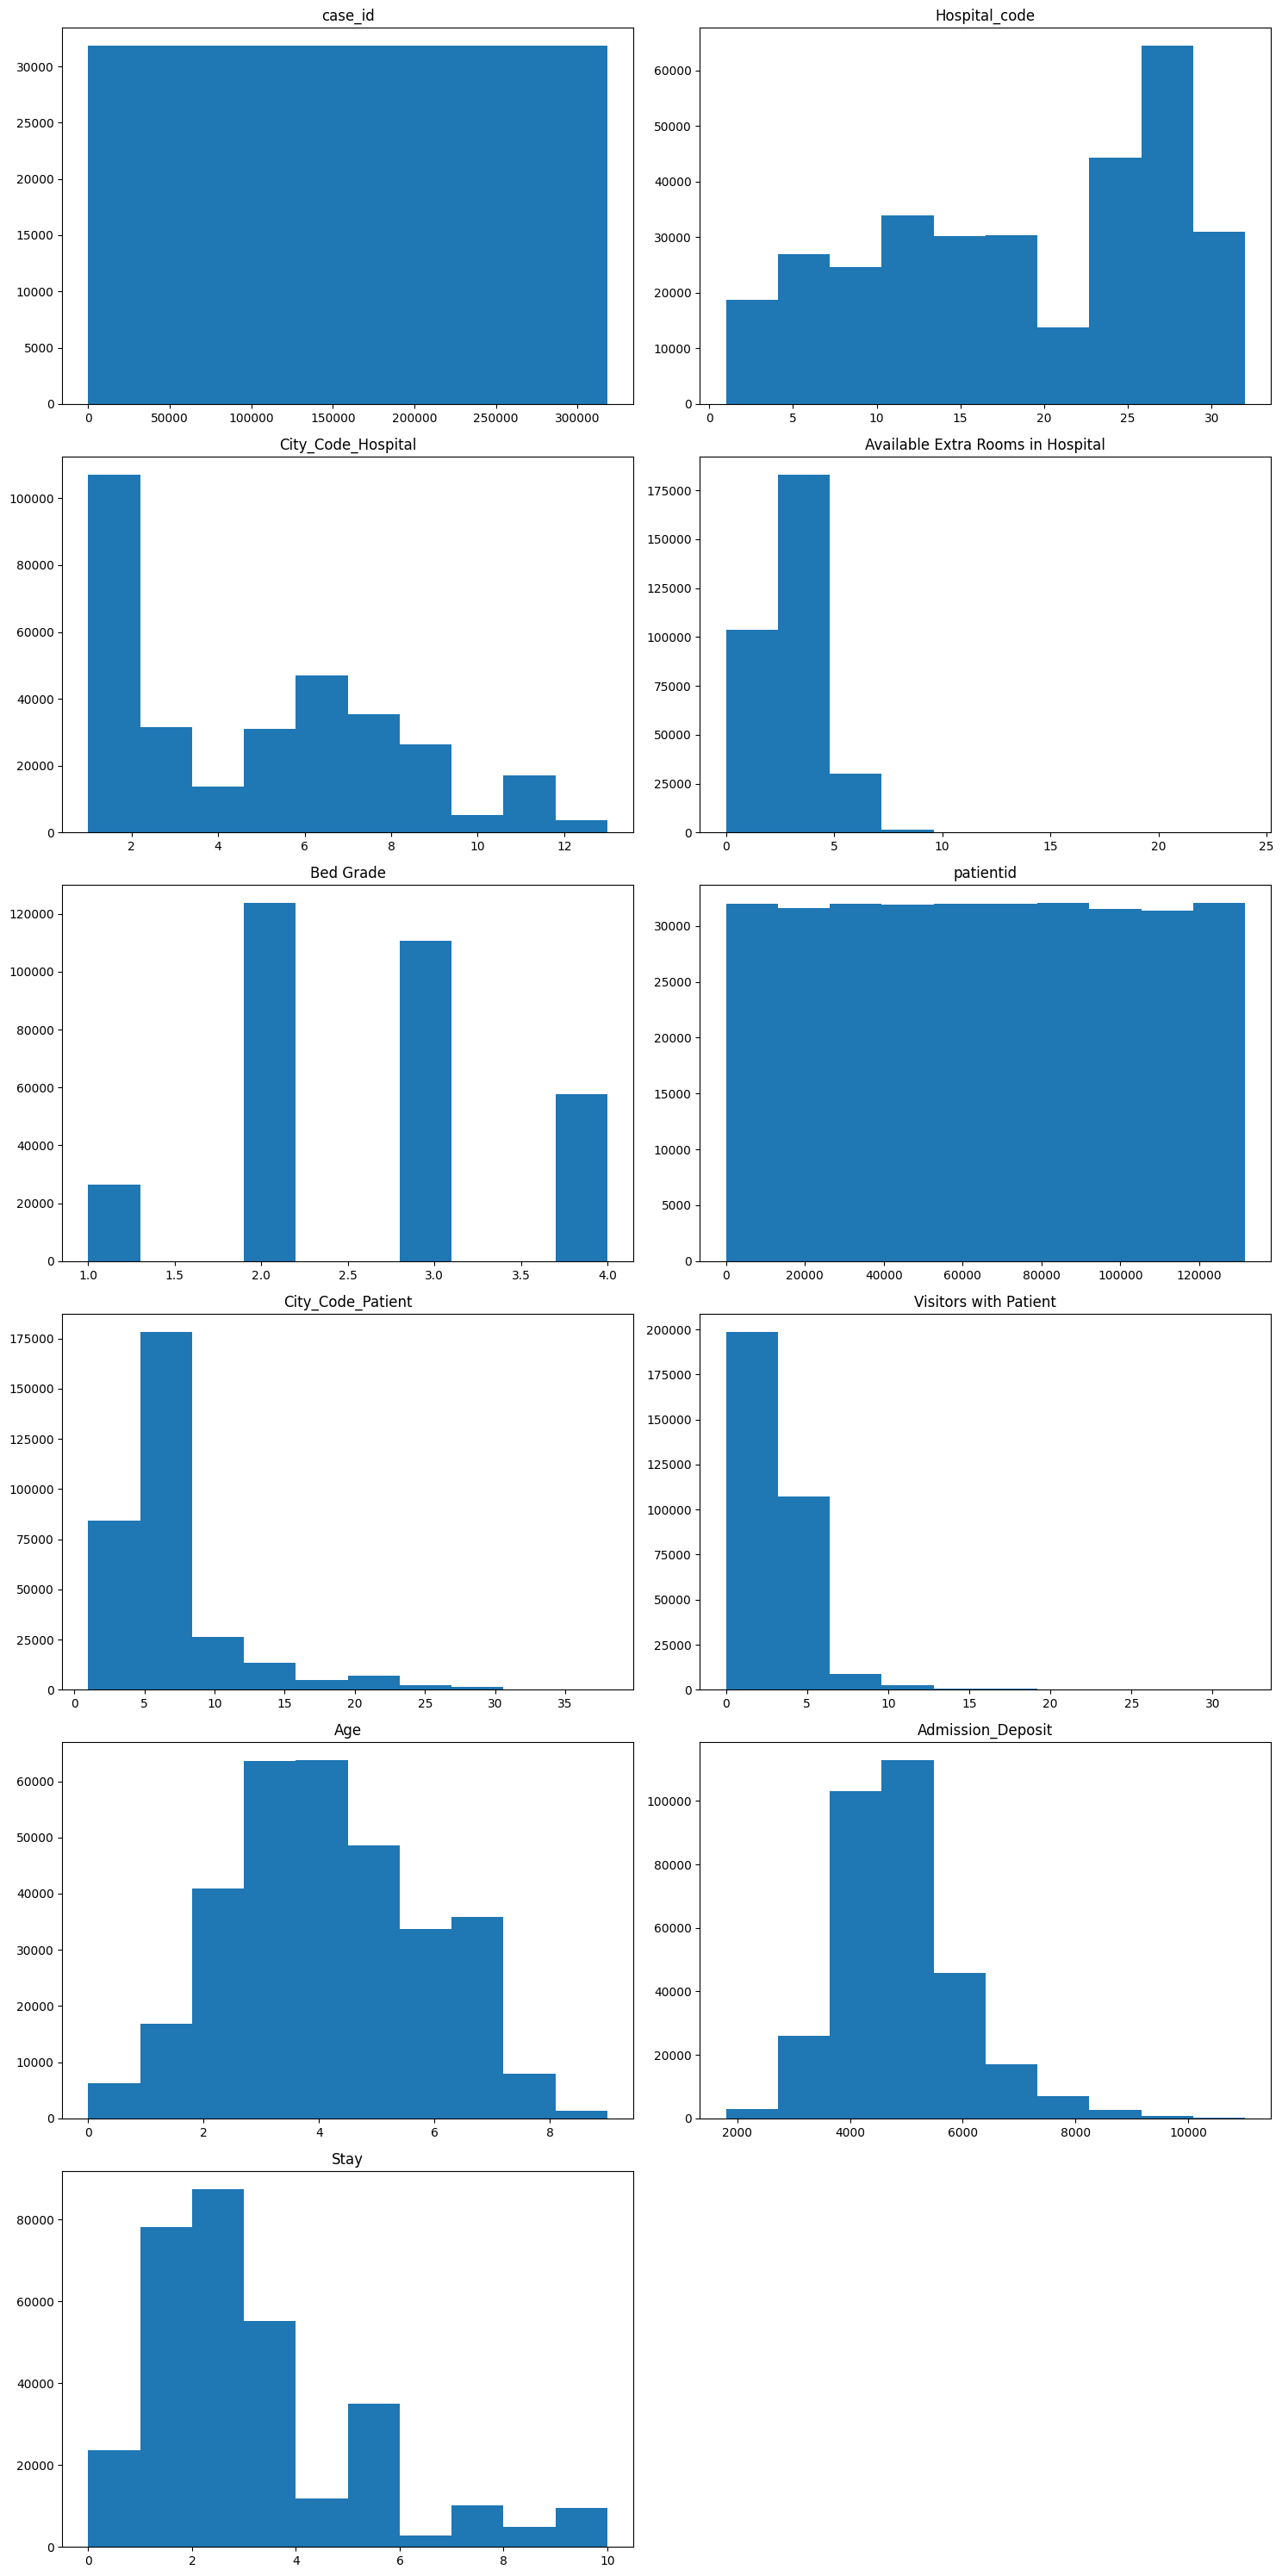

In [17]:
def plot_numerics():
    numerics = train.select_dtypes(include=['int64','float64']).columns
    i=1
    num_cols = len(numerics)
    num_rows = (num_cols // 2) + (num_cols % 2)

    plt.figure(figsize=(15, 5 * num_rows))

    for i, col in enumerate(numerics, start=1):
        plt.subplot(num_rows, 2, i)
        plt.title(col)
        plt.hist(train[col])

    plt.tight_layout()
    plt.show()

plot_numerics()

## Supression de colonnes inutiles

In [18]:
train = train.drop("case_id",axis=1) # La colonne case_id ne nous apporte rien
train = train.drop("patientid",axis=1) # La colonne patientid ne nous apporte rien
print(train.head())

   Hospital_code Hospital_type_code  City_Code_Hospital Hospital_region_code  \
0              8                  c                   3                    Z   
1              2                  c                   5                    Z   
2             10                  e                   1                    X   
3             26                  b                   2                    Y   
4             26                  b                   2                    Y   

   Available Extra Rooms in Hospital    Department Ward_Type  \
0                                  3  radiotherapy         R   
1                                  2  radiotherapy         S   
2                                  2    anesthesia         S   
3                                  2  radiotherapy         R   
4                                  2  radiotherapy         S   

  Ward_Facility_Code  Bed Grade  City_Code_Patient Type of Admission  \
0                  F        2.0                7.0         Eme

## Encodage des colonnes catégorielles

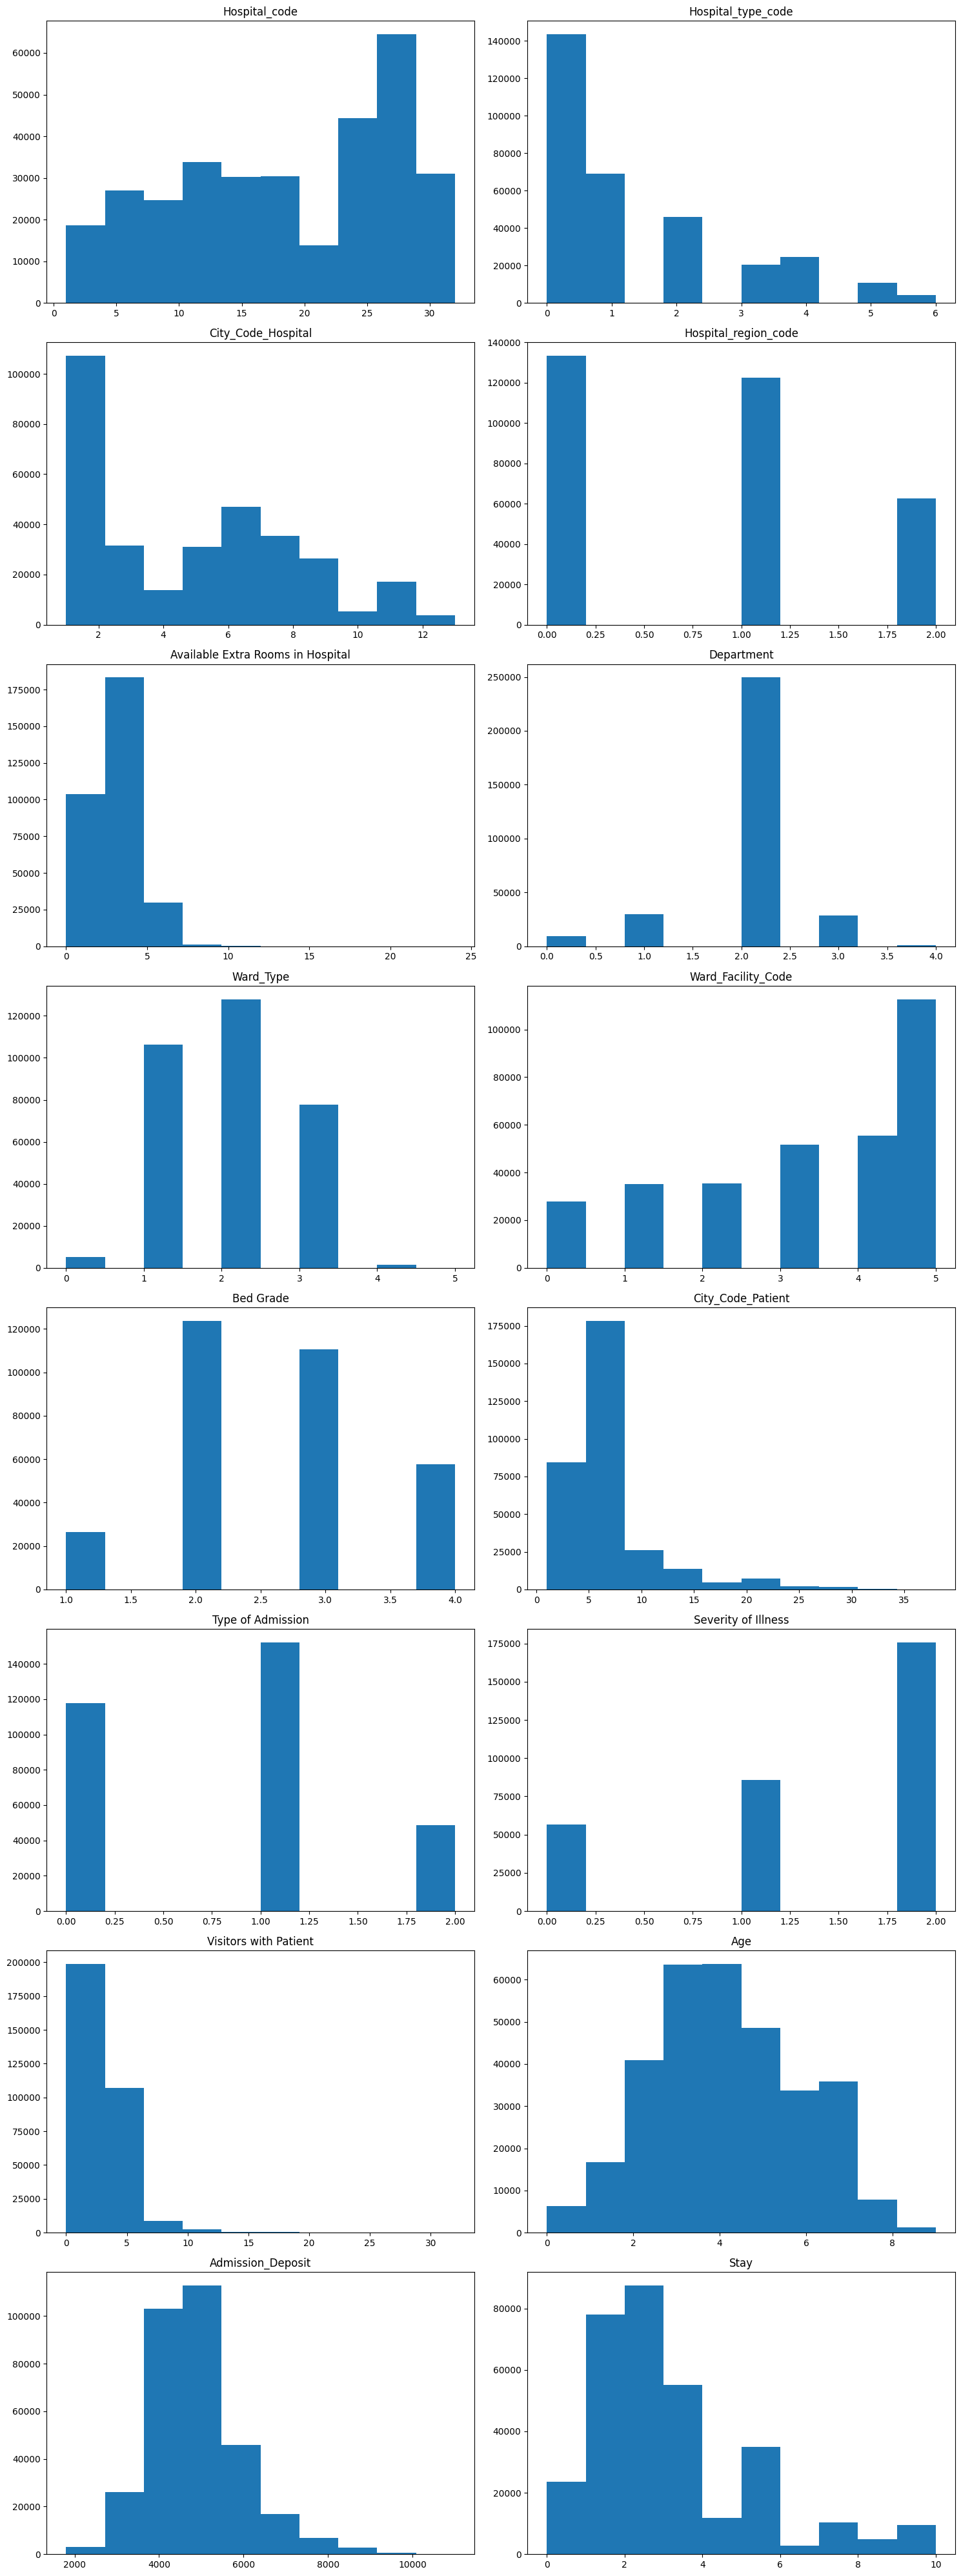

In [19]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in categories:
    train[col]= le.fit_transform(train[col])

plot_numerics()

### Division des labels en trois catégories (trop de catégories)

In [20]:
{'0-10':0,'11-20':1,'21-30':2,'31-40':3,'41-50':4,'51-60':5,'61-70':6,'71-80':7,
 '81-90':8,'91-100':9,'More than 100 Days':10}
train['Stay']= train['Stay'].replace({0:0, 1:0, 2:1, 3:1, 4:2,
                                      5:2,6:2,7:2,8:2,9:2,10:2})

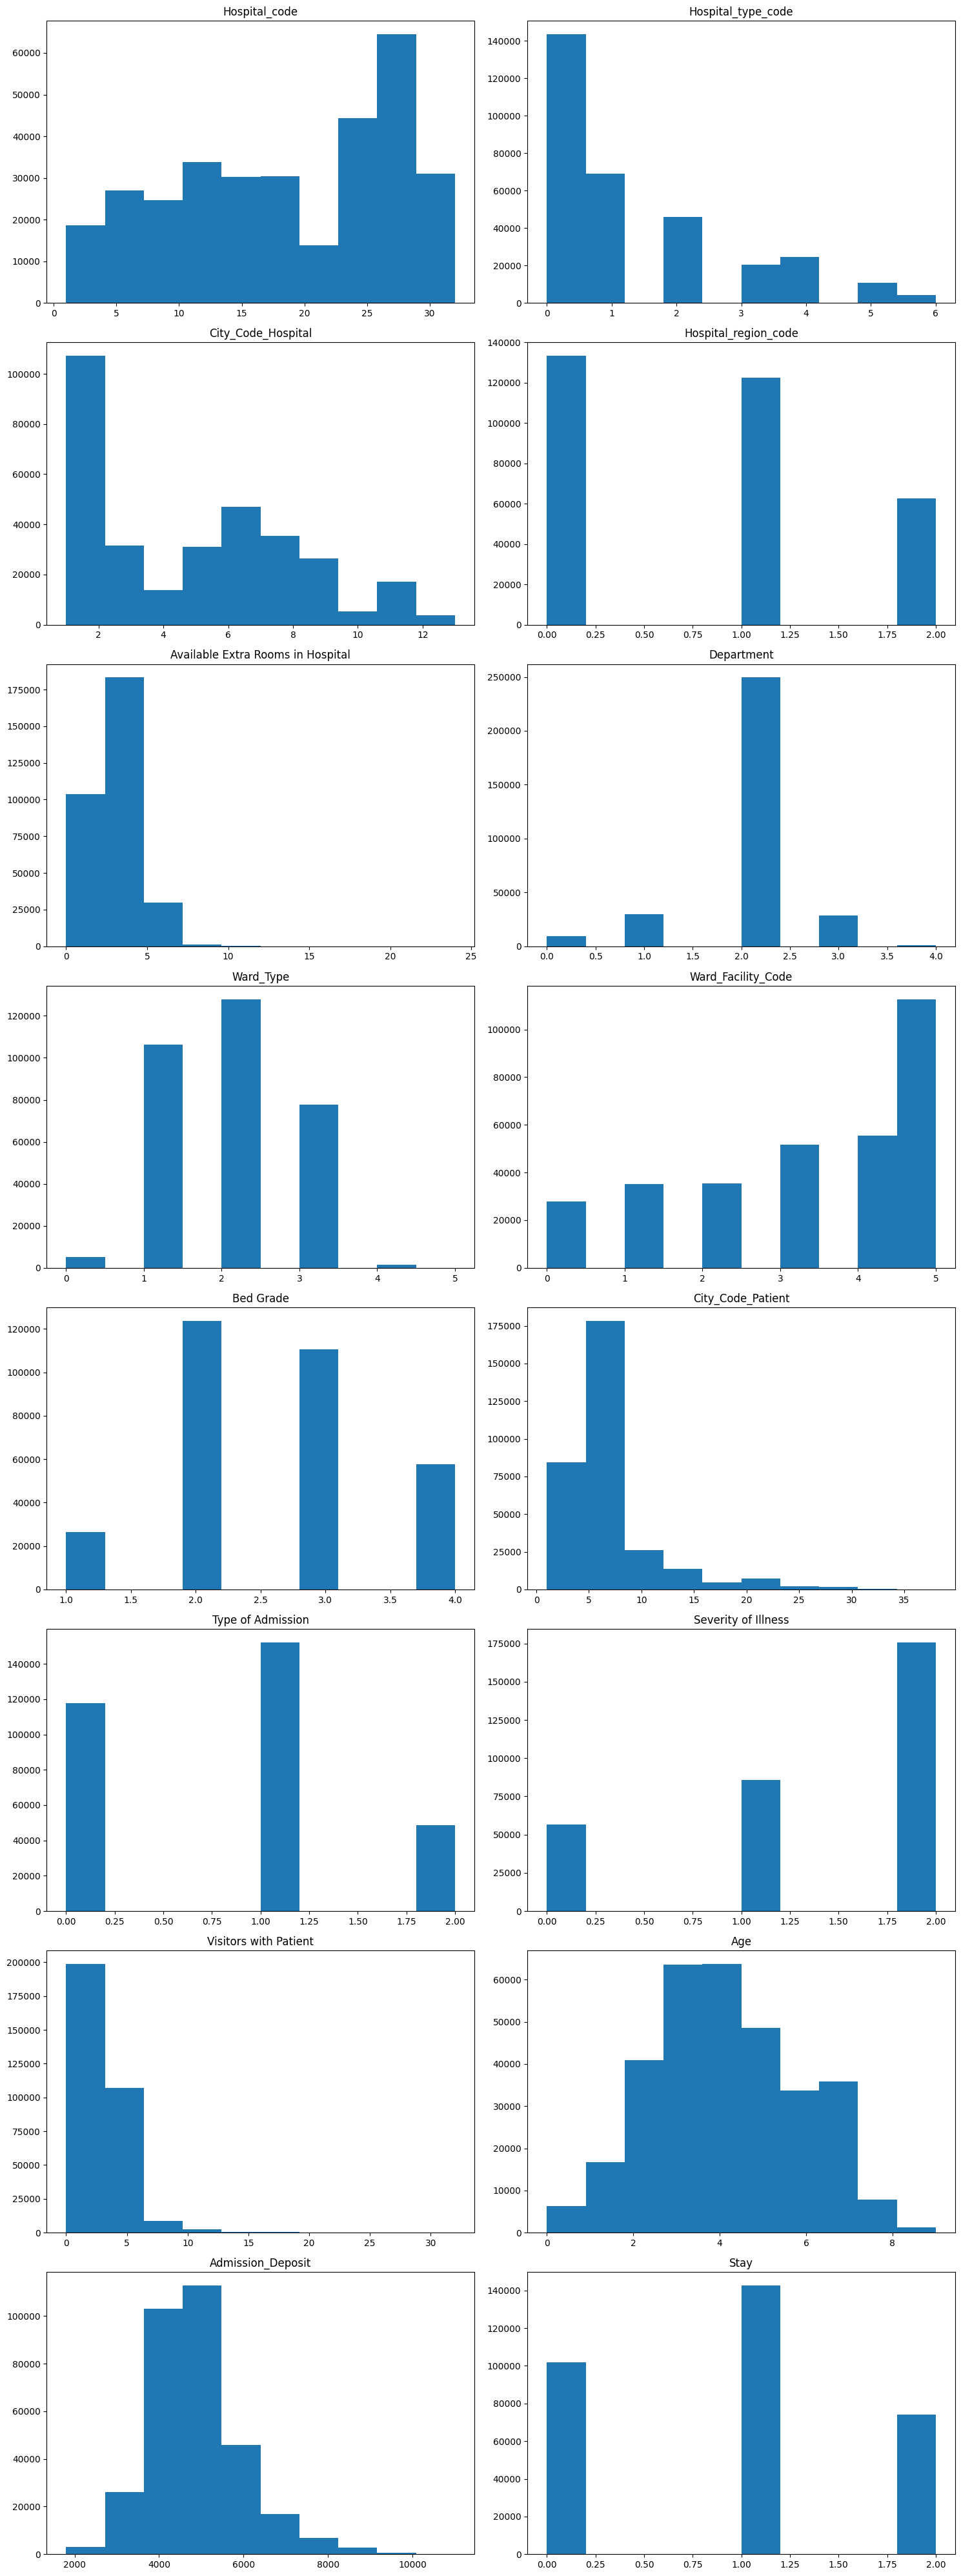

In [21]:
plot_numerics()

In [22]:
print(train['Stay'].value_counts())

Stay
1    142650
0    101743
2     74045
Name: count, dtype: int64


## Attributs ajouté ( Hackathon )

In [23]:
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,2,3,3,2,5,2.0,7.0,0,0,2,5,4911.0,0
1,2,2,5,2,2,3,3,5,2.0,7.0,1,0,2,5,5954.0,2
2,10,4,1,0,2,1,3,4,2.0,7.0,1,0,2,5,4745.0,1
3,26,1,2,1,2,3,2,3,2.0,7.0,1,0,2,5,7272.0,2
4,26,1,2,1,2,3,3,3,2.0,7.0,1,0,2,5,5558.0,2


In [24]:
train['mean_Admission_Deposit_per_illness']=train.groupby(['Severity of Illness'])['Admission_Deposit'].transform('mean')
train['mean_Admission_Deposit_per_admission']=train.groupby(['Type of Admission'])['Admission_Deposit'].transform('mean')
train['mean_Admission_Deposit_per_bed']=train.groupby(['Bed Grade'])['Admission_Deposit'].transform('mean')
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,mean_Admission_Deposit_per_illness,mean_Admission_Deposit_per_admission,mean_Admission_Deposit_per_bed
0,8,2,3,2,3,3,2,5,2.0,7.0,0,0,2,5,4911.0,0,4747.688627,4768.320609,4849.405424
1,2,2,5,2,2,3,3,5,2.0,7.0,1,0,2,5,5954.0,2,4747.688627,4986.646344,4849.405424
2,10,4,1,0,2,1,3,4,2.0,7.0,1,0,2,5,4745.0,1,4747.688627,4986.646344,4849.405424
3,26,1,2,1,2,3,2,3,2.0,7.0,1,0,2,5,7272.0,2,4747.688627,4986.646344,4849.405424
4,26,1,2,1,2,3,3,3,2.0,7.0,1,0,2,5,5558.0,2,4747.688627,4986.646344,4849.405424


In [25]:
train['sum_Admission_Deposit_per_illness']=train.groupby(['Severity of Illness'])['Admission_Deposit'].transform('sum')
train['sum_Admission_Deposit_per_admission']=train.groupby(['Type of Admission'])['Admission_Deposit'].transform('sum')
train['sum_Admission_Deposit_per_bed']=train.groupby(['Bed Grade'])['Admission_Deposit'].transform('sum')
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,...,Visitors with Patient,Age,Admission_Deposit,Stay,mean_Admission_Deposit_per_illness,mean_Admission_Deposit_per_admission,mean_Admission_Deposit_per_bed,sum_Admission_Deposit_per_illness,sum_Admission_Deposit_per_admission,sum_Admission_Deposit_per_bed
0,8,2,3,2,3,3,2,5,2.0,7.0,...,2,5,4911.0,0,4747.688627,4768.320609,4849.405424,269303142.0,561116896.0,600278801.0
1,2,2,5,2,2,3,3,5,2.0,7.0,...,2,5,5954.0,2,4747.688627,4986.646344,4849.405424,269303142.0,759271759.0,600278801.0
2,10,4,1,0,2,1,3,4,2.0,7.0,...,2,5,4745.0,1,4747.688627,4986.646344,4849.405424,269303142.0,759271759.0,600278801.0
3,26,1,2,1,2,3,2,3,2.0,7.0,...,2,5,7272.0,2,4747.688627,4986.646344,4849.405424,269303142.0,759271759.0,600278801.0
4,26,1,2,1,2,3,3,3,2.0,7.0,...,2,5,5558.0,2,4747.688627,4986.646344,4849.405424,269303142.0,759271759.0,600278801.0


In [26]:
train['max_Admission_Deposit_per_illness']=train.groupby(['Severity of Illness'])['Admission_Deposit'].transform('max')
train['max_Admission_Deposit_per_admission']=train.groupby(['Type of Admission'])['Admission_Deposit'].transform('max')
train['max_Admission_Deposit_per_bed']=train.groupby(['Bed Grade'])['Admission_Deposit'].transform('max')
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,...,Stay,mean_Admission_Deposit_per_illness,mean_Admission_Deposit_per_admission,mean_Admission_Deposit_per_bed,sum_Admission_Deposit_per_illness,sum_Admission_Deposit_per_admission,sum_Admission_Deposit_per_bed,max_Admission_Deposit_per_illness,max_Admission_Deposit_per_admission,max_Admission_Deposit_per_bed
0,8,2,3,2,3,3,2,5,2.0,7.0,...,0,4747.688627,4768.320609,4849.405424,269303142.0,561116896.0,600278801.0,11008.0,10785.0,10793.0
1,2,2,5,2,2,3,3,5,2.0,7.0,...,2,4747.688627,4986.646344,4849.405424,269303142.0,759271759.0,600278801.0,11008.0,11008.0,10793.0
2,10,4,1,0,2,1,3,4,2.0,7.0,...,1,4747.688627,4986.646344,4849.405424,269303142.0,759271759.0,600278801.0,11008.0,11008.0,10793.0
3,26,1,2,1,2,3,2,3,2.0,7.0,...,2,4747.688627,4986.646344,4849.405424,269303142.0,759271759.0,600278801.0,11008.0,11008.0,10793.0
4,26,1,2,1,2,3,3,3,2.0,7.0,...,2,4747.688627,4986.646344,4849.405424,269303142.0,759271759.0,600278801.0,11008.0,11008.0,10793.0


In [27]:
train['min_Admission_Deposit_per_illness']=train.groupby(['Severity of Illness'])['Admission_Deposit'].transform('min')
train['min_Admission_Deposit_per_admission']=train.groupby(['Type of Admission'])['Admission_Deposit'].transform('min')
train['min_Admission_Deposit_per_bed']=train.groupby(['Bed Grade'])['Admission_Deposit'].transform('min')
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,...,mean_Admission_Deposit_per_bed,sum_Admission_Deposit_per_illness,sum_Admission_Deposit_per_admission,sum_Admission_Deposit_per_bed,max_Admission_Deposit_per_illness,max_Admission_Deposit_per_admission,max_Admission_Deposit_per_bed,min_Admission_Deposit_per_illness,min_Admission_Deposit_per_admission,min_Admission_Deposit_per_bed
0,8,2,3,2,3,3,2,5,2.0,7.0,...,4849.405424,269303142.0,561116896.0,600278801.0,11008.0,10785.0,10793.0,1800.0,1800.0,1802.0
1,2,2,5,2,2,3,3,5,2.0,7.0,...,4849.405424,269303142.0,759271759.0,600278801.0,11008.0,11008.0,10793.0,1800.0,1801.0,1802.0
2,10,4,1,0,2,1,3,4,2.0,7.0,...,4849.405424,269303142.0,759271759.0,600278801.0,11008.0,11008.0,10793.0,1800.0,1801.0,1802.0
3,26,1,2,1,2,3,2,3,2.0,7.0,...,4849.405424,269303142.0,759271759.0,600278801.0,11008.0,11008.0,10793.0,1800.0,1801.0,1802.0
4,26,1,2,1,2,3,3,3,2.0,7.0,...,4849.405424,269303142.0,759271759.0,600278801.0,11008.0,11008.0,10793.0,1800.0,1801.0,1802.0


In [28]:
train['illness_count']=train.groupby('Hospital_code')['Severity of Illness'].transform('count')
train['bed_count']=train.groupby('Hospital_code')['Bed Grade'].transform('count')
train['room_count']=train.groupby('Hospital_code')['Available Extra Rooms in Hospital'].transform('count')
train['Department_count']=train.groupby('Hospital_code')['Department'].transform('count')
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,...,max_Admission_Deposit_per_illness,max_Admission_Deposit_per_admission,max_Admission_Deposit_per_bed,min_Admission_Deposit_per_illness,min_Admission_Deposit_per_admission,min_Admission_Deposit_per_bed,illness_count,bed_count,room_count,Department_count
0,8,2,3,2,3,3,2,5,2.0,7.0,...,11008.0,10785.0,10793.0,1800.0,1800.0,1802.0,3663,3663,3663,3663
1,2,2,5,2,2,3,3,5,2.0,7.0,...,11008.0,11008.0,10793.0,1800.0,1801.0,1802.0,5102,5102,5102,5102
2,10,4,1,0,2,1,3,4,2.0,7.0,...,11008.0,11008.0,10793.0,1800.0,1801.0,1802.0,9435,9435,9435,9435
3,26,1,2,1,2,3,2,3,2.0,7.0,...,11008.0,11008.0,10793.0,1800.0,1801.0,1802.0,33076,33076,33076,33076
4,26,1,2,1,2,3,3,3,2.0,7.0,...,11008.0,11008.0,10793.0,1800.0,1801.0,1802.0,33076,33076,33076,33076


# Entrainement de différents modèles

### Séparation des données en données d'entrainement et de test

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_data, test_data = train_test_split(train, test_size=0.3, random_state=42)
train_without_stay = train_data.drop("Stay",axis=1)
test_without_stay = test_data.drop("Stay",axis=1)
# Print the shapes of the training and test sets
print("Training data shape:", train.shape)
print("Test data shape:", test_data.shape)

Training data shape: (318438, 32)
Test data shape: (95532, 32)


### Entrainement des modèles

Les modèles utilisés sont les suivants :
- Forêt aléatoire
- Régression logistique
- Arbre de décision
- K plus proches voisins
- CatBoost
- XGBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier


# Forêt aléatoire
print("Entrainement du modèle de forêt aléatoire...")
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(train_without_stay, train_data['Stay'])

# Regression logistique
print("Entrainement du modèle de régression logistique...")
logreg = LogisticRegression()
logreg.fit(train_without_stay, train_data['Stay'])

# Arbre de décision
print("Entrainement du modèle d'arbre de décision...")
dt_clf = DecisionTreeClassifier()
dt_clf.fit(train_without_stay, train_data['Stay'])

# K plus proches voisins
print("Entrainement du modèle de K plus proches voisins...")
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_without_stay, train_data['Stay'])

# CatBoost
print("Entrainement du modèle de CatBoost...")
cat_clf = CatBoostClassifier()
cat_clf.fit(train_without_stay, train_data['Stay'])

# XGBoost
print("Entrainement du modèle de XGBoost...")
xgb_clf = XGBClassifier()
xgb_clf.fit(train_without_stay, train_data['Stay'])



### Evaluation des modèles

Métriques utilisées :
- Accuracy
- Rappel
- Précision
- F1-score
- AUC
- Log loss
- Matrice de confusion

In [44]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, log_loss, confusion_matrix
def evaluation(models, X_test, y_test):
    for model in models:
        y_pred = model.predict(X_test)
        print("Evaluation du modèle", model)
        print("Recall:", recall_score(y_test, y_pred, average='macro'))
        print("Accuracy:", model.score(X_test, y_test))
        print("Precision:", precision_score(y_test, y_pred, average='macro'))
        print("F1-score:", f1_score(y_test, y_pred, average='macro'))
        print("Area under ROC:", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
        print("Log loss:", log_loss(y_test, model.predict_proba(X_test)))
        print("Confusion matrix:")
        #Confusion matrix
        confusion_matrix_data = confusion_matrix(test_data["Stay"], clf.predict(test_without_stay))
        # Affichage de la matrice de confusion de façon graphique
        plt.matshow(confusion_matrix_data)
        plt.title('Confusion matrix')
        plt.colorbar()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
        print("------------------------------------------------------")

# Fonction qui permet l'affichage des matrices de confusion de tout les modèles utilisés à la suite afin de pouvoir les comparer
def plot_confusion_matrix(models, X_test, y_test):
    fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5))
    
    for i, model in enumerate(models):
        y_pred = model.predict(X_test)
        confusion_matrix_data = confusion_matrix(y_test, y_pred)
        
        axes[i].matshow(confusion_matrix_data)
        axes[i].set_title(model.__class__.__name__)
        axes[i].set_xlabel('Predicted label')
        axes[i].set_ylabel('True label')
    
    plt.tight_layout()
    plt.show()


Evaluation du modèle RandomForestClassifier(max_depth=6, random_state=0)
Recall: 0.527355263802379
Accuracy: 0.5601997236528075
Precision: 0.5956097040770042
F1-score: 0.5382825848111472
Area under ROC: 0.736979133907535
Log loss: 0.9196585395489807
Confusion matrix:


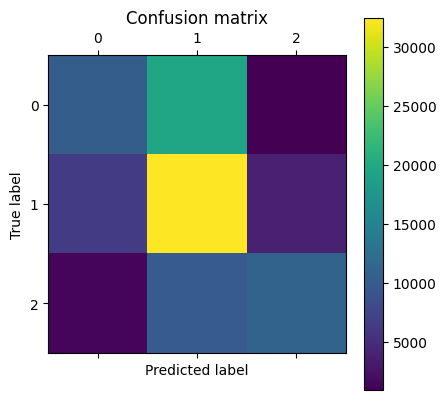

------------------------------------------------------
Evaluation du modèle LogisticRegression()
Recall: 0.3333333333333333
Accuracy: 0.4476510488632081
Precision: 0.14921701628773604
F1-score: 0.20615053110335002


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Area under ROC: 0.5361319663478922
Log loss: 1.0613261630609416
Confusion matrix:


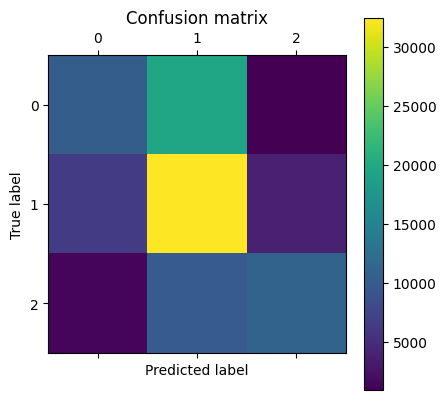

------------------------------------------------------
Evaluation du modèle DecisionTreeClassifier()
Recall: 0.4945094089394457
Accuracy: 0.49459866850898127
Precision: 0.49353091814990663
F1-score: 0.4940068763098891
Area under ROC: 0.6144417568622206
Log loss: 18.213319159621314
Confusion matrix:


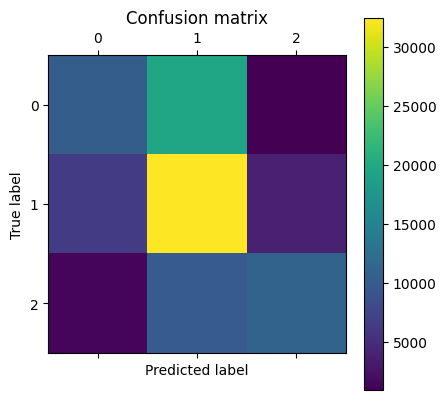

------------------------------------------------------
Evaluation du modèle KNeighborsClassifier()
Recall: 0.393065597645646
Accuracy: 0.43077712180211863
Precision: 0.4090051945803897
F1-score: 0.3877665529834849
Area under ROC: 0.5734490413258545
Log loss: 5.265862341608438
Confusion matrix:


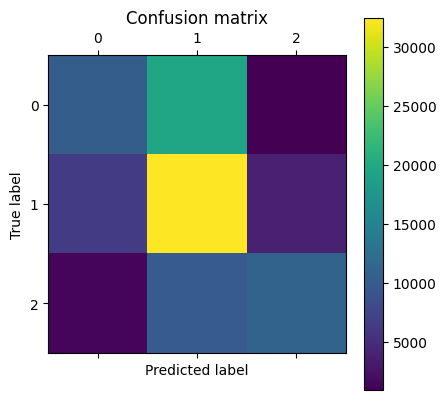

------------------------------------------------------
Evaluation du modèle <catboost.core.CatBoostClassifier object at 0x00000219E306AF50>
Recall: 0.5969004473054483
Accuracy: 0.6061843152032826
Precision: 0.6228804792458926
F1-score: 0.6068832374965645
Area under ROC: 0.7775793505154267
Log loss: 0.828459154371984
Confusion matrix:


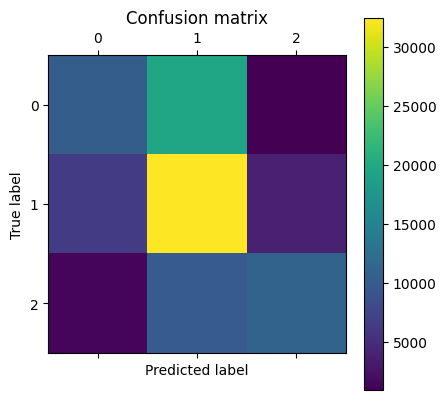

------------------------------------------------------
Evaluation du modèle XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Recall: 0.5974120212946415
Accuracy: 0.6061843152032826
Precision: 0.62201902501967
F1-score: 0.6068744107892196
Area under ROC: 0.7770159039029328
Log loss:

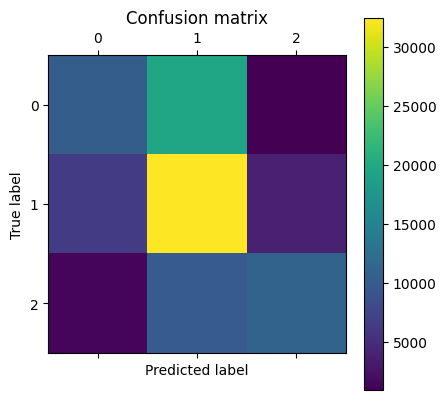

------------------------------------------------------


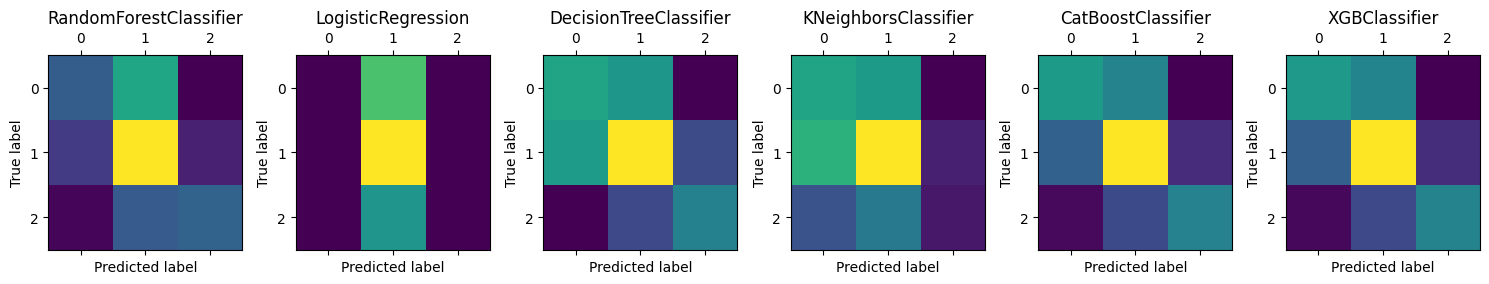

In [ ]:
# Affichage des performances des modèles
models = [clf, logreg, dt_clf, knn_clf, cat_clf, xgb_clf]
evaluation(models, test_without_stay, test_data["Stay"])
plot_confusion_matrix(models, test_without_stay, test_data["Stay"])

In [39]:
train_data['Stay'].iloc[0]

np.int64(1)

## Cross - Validation 

In [41]:
from sklearn.preprocessing import LabelEncoder

# Appliquer l'encodage sur toutes les colonnes non numériques
for col in train_without_stay.select_dtypes(include=['object', 'string']).columns:
    le = LabelEncoder()
    train_without_stay[col] = le.fit_transform(train_without_stay[col])

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scores = []
avg_loss = []

# Cross-validation stratifiée
sssf = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

# Modèles
clf = RandomForestClassifier(max_depth=6, random_state=0)
logreg = LogisticRegression(max_iter=1000)  # Ajout de max_iter pour éviter les erreurs de convergence
dt_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()

allModel = [clf, logreg, dt_clf, knn_clf]

# Validation croisée
for model in allModel:
    print("\n\n=== Training model:", model.__class__.__name__, "===")
    for i, (idxT, idxV) in enumerate(sssf.split(train_without_stay, train_data['Stay'])):
        print(f"Fold {i+1}")
        print(f"Rows of train = {len(idxT)}, rows of holdout = {len(idxV)}")

        # Entraînement
        model.fit(train_without_stay.iloc[idxT], train_data['Stay'].iloc[idxT])

        # Validation
        predictions = model.predict(train_without_stay.iloc[idxV])
        accuracy = accuracy_score(train_data['Stay'].iloc[idxV], predictions)
        scores.append(accuracy)

        print(f"Accuracy for fold {i+1}: {accuracy:.4f}")

# Résumé des scores
print("\n=== Résumé des scores ===")
print(f"Accuracy moyenne: {sum(scores)/len(scores):.4f}")



=== Training model: RandomForestClassifier ===
Fold 1
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 1: 0.5577
Fold 2
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 2: 0.5556
Fold 3
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 3: 0.5574
Fold 4
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 4: 0.5564
Fold 5
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 5: 0.5618


=== Training model: LogisticRegression ===
Fold 1
Rows of train = 156034, rows of holdout = 66872


/Users/noahberneaud/.local/share/virtualenvs/followme-bzt7wQRK/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for fold 1: 0.4448
Fold 2
Rows of train = 156034, rows of holdout = 66872


/Users/noahberneaud/.local/share/virtualenvs/followme-bzt7wQRK/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for fold 2: 0.4437
Fold 3
Rows of train = 156034, rows of holdout = 66872


/Users/noahberneaud/.local/share/virtualenvs/followme-bzt7wQRK/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for fold 3: 0.4450
Fold 4
Rows of train = 156034, rows of holdout = 66872


/Users/noahberneaud/.local/share/virtualenvs/followme-bzt7wQRK/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for fold 4: 0.4447
Fold 5
Rows of train = 156034, rows of holdout = 66872


/Users/noahberneaud/.local/share/virtualenvs/followme-bzt7wQRK/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for fold 5: 0.4458


=== Training model: DecisionTreeClassifier ===
Fold 1
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 1: 0.4932
Fold 2
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 2: 0.4926
Fold 3
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 3: 0.4915
Fold 4
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 4: 0.4907
Fold 5
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 5: 0.4916


=== Training model: KNeighborsClassifier ===
Fold 1
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 1: 0.4271
Fold 2
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 2: 0.4265
Fold 3
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 3: 0.4271
Fold 4
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 4: 0.4253
Fold 5
Rows of train = 156034, rows of holdout = 66872
Accuracy for fold 5: 0.4284

=== Résumé des scores ===
Accuracy moyenne: 0

Evaluation du modèle RandomForestClassifier(max_depth=6, random_state=0)
Recall: 0.5254012124284787
Accuracy: 0.559466984884646
Precision: 0.5965230307034622
F1-score: 0.5362403677799298
Area under ROC: 0.7382758549273927
Log loss: 0.9191829694867194
Confusion matrix:


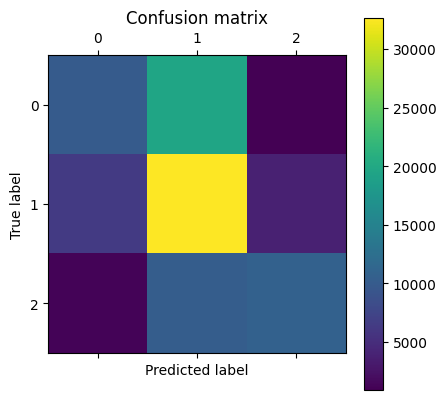

------------------------------------------------------
Evaluation du modèle LogisticRegression(max_iter=1000)
Recall: 0.33489517749259196
Accuracy: 0.4460390235732529
Precision: 0.26375851321152516
F1-score: 0.22279896052284587
Area under ROC: 0.5593443049712598
Log loss: 1.057437812120157
Confusion matrix:


/Users/noahberneaud/.local/share/virtualenvs/followme-bzt7wQRK/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


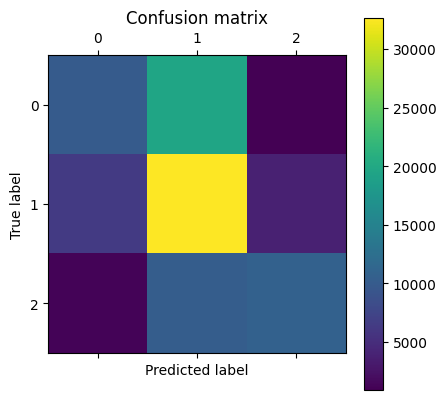

------------------------------------------------------
Evaluation du modèle DecisionTreeClassifier()
Recall: 0.49189653585194487
Accuracy: 0.4922748398442407
Precision: 0.491277565978913
F1-score: 0.49158156780817636
Area under ROC: 0.6123585045420412
Log loss: 18.296990133778472
Confusion matrix:


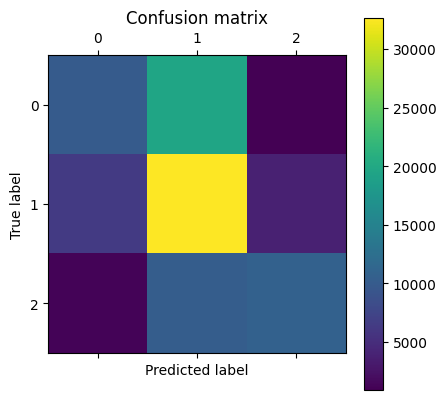

------------------------------------------------------
Evaluation du modèle KNeighborsClassifier()
Recall: 0.39076602533470955
Accuracy: 0.4284742285307541
Precision: 0.40535238946615654
F1-score: 0.38574394134066
Area under ROC: 0.5711115296436693
Log loss: 5.295908325707194
Confusion matrix:


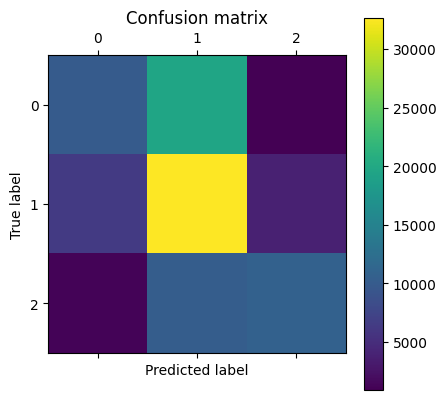

------------------------------------------------------


In [47]:
for col in test_without_stay.select_dtypes(include=['object', 'string']).columns:
    le = LabelEncoder()
    test_without_stay[col] = le.fit_transform(test_without_stay[col])

evaluation(allModel, test_without_stay, test_data["Stay"])